In [1]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt, rcParams
from matplotlib_inline.backend_inline import set_matplotlib_formats

rcParams["figure.figsize"] = (8, 5)
rcParams["figure.dpi"] = 100
set_matplotlib_formats("retina")
plt.style.use("seaborn")

In [2]:
def load_npz(filename):
    array_dict = np.load(os.path.join(directory, filename))
    return np.array([array_dict[key] for key in array_dict], dtype=object)

In [3]:
df = pd.read_csv("data/train_data_binary.csv")
pos_mask = df.label == 1
neg_mask = df.label == 0

# Likelihood

In [4]:
directory = "output/experiment1"
filenames = list(
    filter(lambda filename: filename.endswith("likelihood.npz"), os.listdir(directory))
)
filenames

['rand_masked_likelihood.npz',
 'masked_likelihood.npz',
 'no_masked_likelihood.npz']

In [5]:
likelihoods = {
    filename.split('.')[0]: load_npz(filename)
    for filename in filenames
}

In [6]:
def get_average_likelihood(probs, mask):
    likelihoods = [np.mean(np.exp(sequence)) for sequence in probs[mask]]
    return np.mean(likelihoods)

In [7]:
average_likelihoods = {filename: get_average_likelihood(probs, pos_mask) for filename, probs in likelihoods.items()}

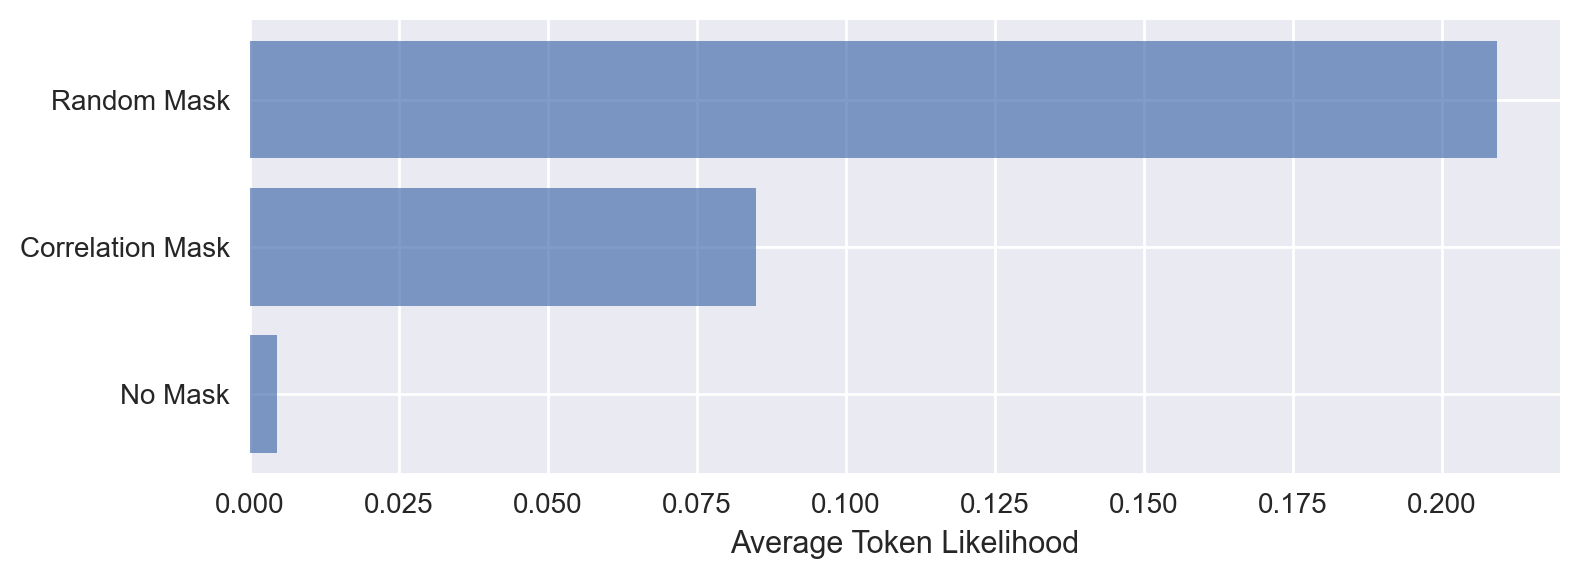

In [12]:
widths = average_likelihoods.values()
labels = ['No Mask', 'Correlation Mask', 'Random Mask']

plt.figure(figsize=(8,3))
plt.barh(labels, widths, alpha=0.7)

plt.xlabel('Average Token Likelihood')

plt.tight_layout()
plt.show()

# KL Divergence

In [4]:
directory = "output/experiment1"
filenames = list(
    filter(lambda filename: filename.endswith("probs.npz"), os.listdir(directory))
)
filenames

['masked_log_probs.npz',
 'no_masked_log_probs.npz',
 'rand_masked_log_probs.npz']

In [5]:
def kl_div(P, Q):
    return np.sum(P * np.log(P / Q))

In [7]:
log_probs = {
    filename.split('.')[0]: load_npz(filename)
    for filename in filenames
}

In [12]:
pos_divs = [
    kl_div(
        np.exp(masked[0].astype(float)),
        np.exp(no_masked[0].astype(float)),
    )
    for masked, no_masked in zip(
        log_probs["masked_log_probs"][pos_mask], log_probs["no_masked_log_probs"][pos_mask]
    )
]

neg_divs = [
    kl_div(
        np.exp(masked[0].astype(float)),
        np.exp(no_masked[0].astype(float)),
    )
    for masked, no_masked in zip(
        log_probs["masked_log_probs"][neg_mask], log_probs["no_masked_log_probs"][neg_mask]
    )
]

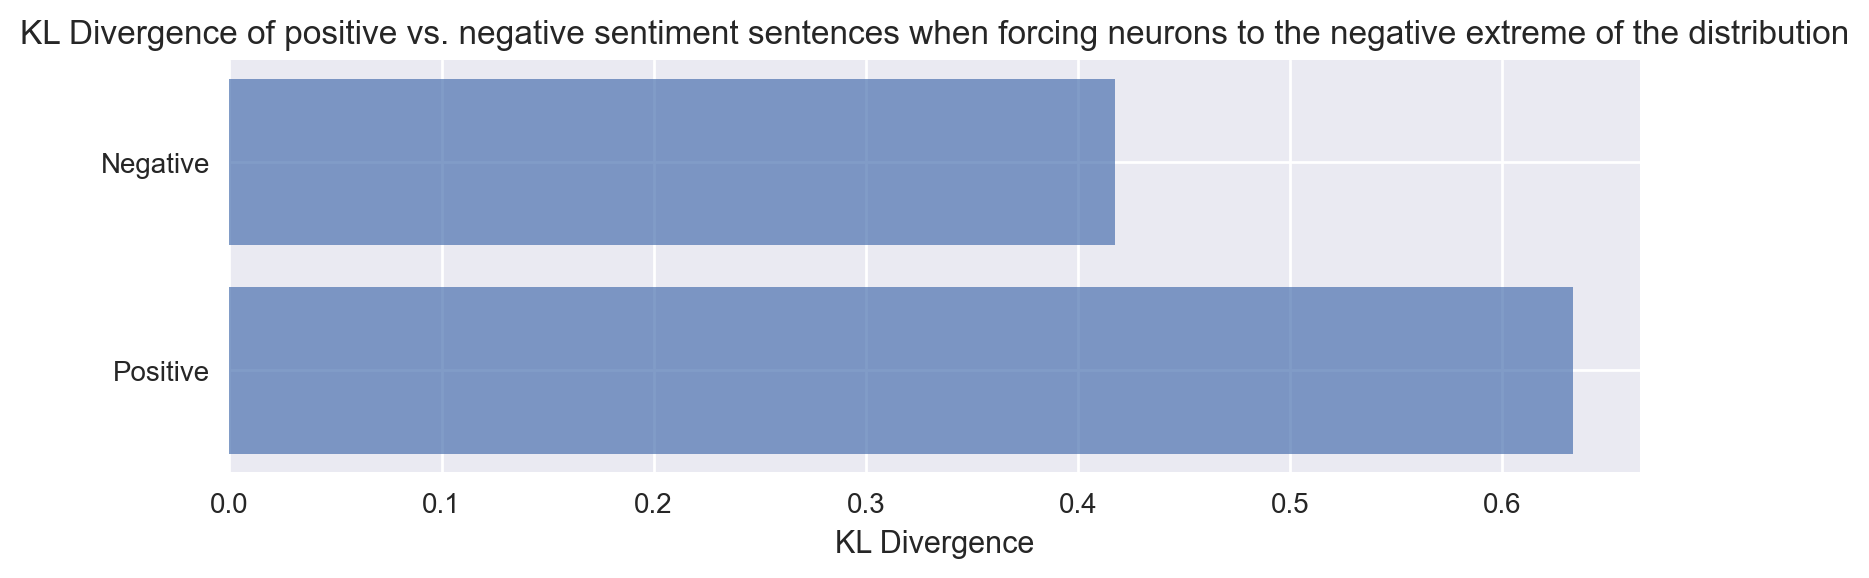

In [26]:
widths = [np.mean(pos_divs), np.mean(neg_divs)]

plt.figure(figsize=(8,3))
plt.barh(['Positive', 'Negative'], widths, alpha=0.7)

plt.xlabel('KL Divergence')
plt.title('KL Divergence of positive vs. negative sentiment sentences when forcing neurons to the negative extreme of the distribution')

plt.tight_layout()
plt.show()